In [1]:
## import the packages tools 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
%matplotlib inline  

In [2]:
df = pd.read_csv('house-prices.csv', low_memory=False)
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


## EDA

In [3]:
df.shape

(33656, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


In [6]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

> we have missing value on 'GARAGE', 'BUILD_YEAR' and 'NEAREST_SCH_RANK'

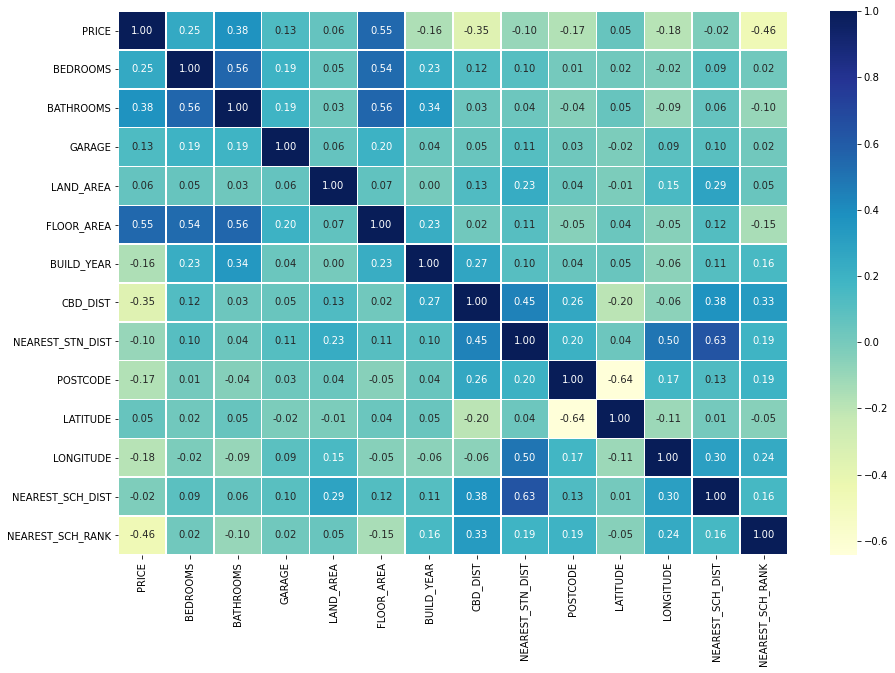

In [7]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax  = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f',
                 cmap='YlGnBu')

> as an overview there are positive relationship between bathroom,
long area with property prices while other variables showed negative 
relationship such as build year and NEAREST_SCH_RANK

In [8]:
df.duplicated().sum()

0

In [9]:
df_tmp = df.copy()
df_tmp = df_tmp.drop('NEAREST_SCH_RANK', axis=1)

## Missing values 

In [10]:
df_tmp.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922


In [12]:
df_tmp['BUILD_YEAR']=SimpleImputer(strategy='most_frequent').fit_transform(df_tmp[['BUILD_YEAR']])
df_tmp['GARAGE'] = df_tmp['GARAGE'].fillna(df_tmp['GARAGE'].mean())

In [13]:
df_tmp.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
dtype: int64

## Feature Engineering

In [14]:
df_tmp['DATE_SOLD'] = df_tmp['DATE_SOLD'].str.replace(r'\\r', '').str.strip()

<ipython-input-14-787bb707c21f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tmp['DATE_SOLD'] = df_tmp['DATE_SOLD'].str.replace(r'\\r', '').str.strip()


In [15]:
df_tmp['DATE_SOLD'] = pd.to_datetime(df_tmp['DATE_SOLD'], format='%m-%Y')
df_tmp['year'] = df_tmp['DATE_SOLD'].dt.year

In [16]:
df_tmp['Price_Per_Area']=df_tmp['PRICE']/df_tmp['BUILD_YEAR']
df_tmp['Home_Age']=2024-df_tmp['BUILD_YEAR'].astype(dtype=np.int64)
df_tmp['Rooms']=df_tmp['BEDROOMS']+df_tmp['BATHROOMS']+2

In [17]:
df_tmp = df_tmp.drop('DATE_SOLD', axis=1)

In [18]:
df_tmp.to_csv('trial.csv', index=False)

## visualization

In [19]:
df_tmp.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,...,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,year,Price_Per_Area,Home_Age,Rooms
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,...,1800,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,2018,282.076885,21,8
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,...,4900,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,2019,181.321411,11,7
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,...,1900,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,2015,145.022739,45,6
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,...,3600,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,2018,130.568356,71,5
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,...,2000,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,2016,162.662663,26,7


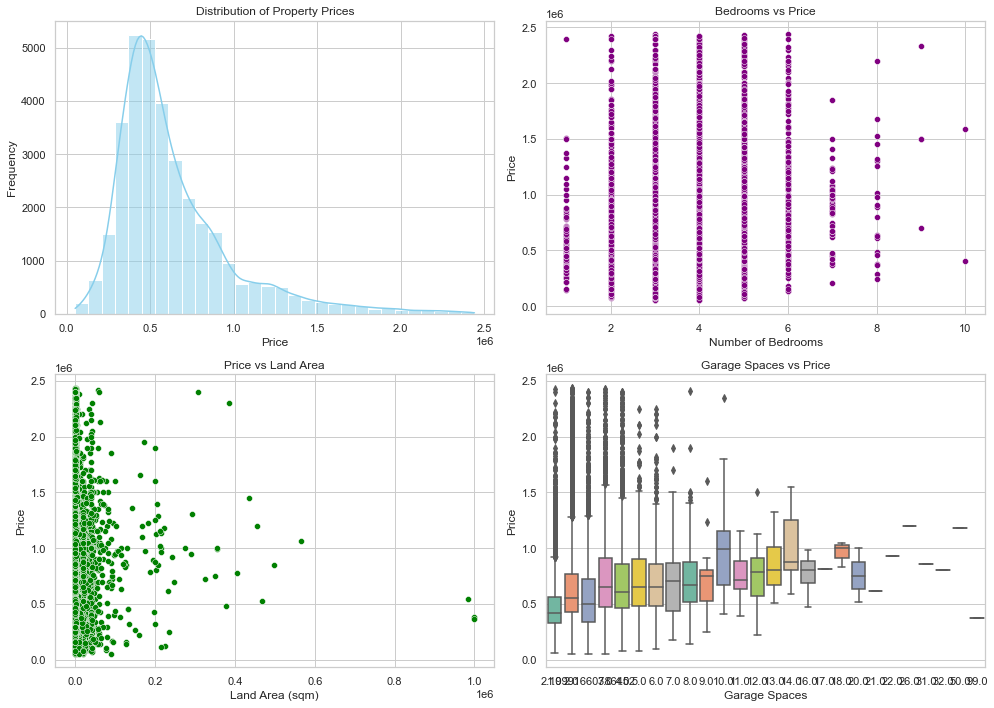

In [26]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Visualization 1: Distribution of Property Prices
sns.histplot(df_tmp['PRICE'], bins=30, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of Property Prices')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')

# Visualization 2: Bedrooms vs Price
sns.scatterplot(x='BEDROOMS', y='PRICE', data=df_tmp, ax=axs[0, 1], color='purple')
axs[0, 1].set_title('Bedrooms vs Price')
axs[0, 1].set_xlabel('Number of Bedrooms')
axs[0, 1].set_ylabel('Price')

# Visualization 3: Price vs Land Area
sns.scatterplot(x='LAND_AREA', y='PRICE', data=df_tmp, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Price vs Land Area')
axs[1, 0].set_xlabel('Land Area (sqm)')
axs[1, 0].set_ylabel('Price')

# Visualization 4: Garage Spaces vs Price
sns.boxplot(x='GARAGE', y='PRICE', data=df_tmp, ax=axs[1, 1], palette='Set2')
axs[1, 1].set_title('Garage Spaces vs Price')
axs[1, 1].set_xlabel('Garage Spaces')
axs[1, 1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

## Tranforme the data 

In [27]:
## check first what column is numeric 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PRICE
BEDROOMS
BATHROOMS
GARAGE
LAND_AREA
FLOOR_AREA
BUILD_YEAR
CBD_DIST
NEAREST_STN_DIST
POSTCODE
LATITUDE
LONGITUDE
NEAREST_SCH_DIST
year
Price_Per_Area
Home_Age
Rooms


In [31]:
## check first what column is numeric 
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

ADDRESS
SUBURB
NEAREST_STN
NEAREST_SCH


In [35]:
df_tmp = df_tmp.drop(['ADDRESS','POSTCODE','NEAREST_STN','NEAREST_SCH'], axis=1)
df_tmp 

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,year,Price_Per_Area,Home_Age,Rooms
0,South Lake,565000,4,2,2.0,600,160,2003.0,18300,1800,-32.115900,115.842450,0.828339,2018,282.076885,21,8
1,Wandi,365000,3,2,2.0,351,139,2013.0,26900,4900,-32.193470,115.859554,5.524324,2019,181.321411,11,7
2,Camillo,287000,3,1,1.0,719,86,1979.0,22600,1900,-32.120578,115.993579,1.649178,2015,145.022739,45,6
3,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,3600,-31.900547,116.038009,1.571401,2018,130.568356,71,5
4,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,2000,-31.885790,115.947780,1.514922,2016,162.662663,26,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,1500,-32.064580,115.751820,1.430350,2016,516.641828,11,9
33652,Westminster,410000,3,2,2.0,228,114,2000.0,9600,4600,-31.867055,115.841403,1.679644,2017,205.000000,24,7
33653,Westminster,427000,3,2,2.0,261,112,2000.0,9600,4600,-31.866890,115.841418,1.669159,2017,213.500000,24,7
33654,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,4400,-31.839680,115.842410,0.358494,2016,149.442756,50,6


In [39]:
data = pd.get_dummies(df_tmp, columns=['SUBURB'], prefix='SUBURB')


In [40]:
data.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,...,SUBURB_Wilson,SUBURB_Winthrop,SUBURB_Woodbridge,SUBURB_Woodlands,SUBURB_Woodvale,SUBURB_Wooroloo,SUBURB_Wungong,SUBURB_Yanchep,SUBURB_Yangebup,SUBURB_Yokine
0,565000,4,2,2.0,600,160,2003.0,18300,1800,-32.115900,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2.0,351,139,2013.0,26900,4900,-32.193470,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,1.0,719,86,1979.0,22600,1900,-32.120578,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,2.0,651,59,1953.0,17900,3600,-31.900547,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,2.0,466,131,1998.0,11200,2000,-31.885790,...,0,0,0,0,0,0,0,0,0,0


## modeling

In [44]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [47]:
models = {'Randomresgression':RandomForestRegressor(),
          'svm':SVC(),
          'DecisionTreeRegressor':DecisionTreeRegressor()}

In [49]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score


for i in models: 
    df_1 = models[i]
    df_1.fit(X_train, y_train)
    df_2 = df_1.predict(X_test)
    mean_absolute = mean_absolute_error(y_test,df_2)
    mean_squared = mean_squared_log_error(y_test,df_2)
    r_square = r2_score(y_test, df_2)
    print('mean_absolute of '+i+': ',mean_absolute)
    print('mean_squared of '+i+': ',mean_squared)
    print('r_square of '+i+': ', r_square)

mean_absolute of Randomresgression:  5674.805604575163
mean_squared of Randomresgression:  0.00014588790197083126
r_square of Randomresgression:  0.9993426636516387
mean_absolute of svm:  156614.95632798574
mean_squared of svm:  0.1280654113986268
r_square of svm:  0.5251631862979832
mean_absolute of DecisionTreeRegressor:  5804.042780748663
mean_squared of DecisionTreeRegressor:  0.00015889749021155252
r_square of DecisionTreeRegressor:  0.9992679703801591
